In [32]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd6941ee1-ea18-4183-8d7b-1c6ed770fd27',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
import pandas as pd 

#set to display all columns
pd.set_option('display.max_columns' , None)

In [34]:
df = pd.json_normalize(data['data'])
#add time-stamp
df['timestamp'] = pd.to_datetime('now' , utc = True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10085,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19312825.00000,19312825.00000,NaN,1,NaN,NaN,NaN,2023-03-09T21:42:00.000Z,20284.77517,30647094599.00053,44.00800,-1.65271,-7.89317,-13.44727,-12.59825,19.44538,18.58885,391756313059.04871,41.62660,425980278609.67999,NaN,2023-03-09T21:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 21:45:08.914679+00:00
1,1027,Ethereum,ETH,ethereum,6562,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-09T21:42:00.000Z,1435.96296,9717303385.78906,48.19420,-2.05066,-7.65706,-12.62286,-13.79134,12.86124,13.86580,175724339713.95682,18.66550,175724339713.95999,NaN,2023-03-09T21:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 21:45:08.914679+00:00
2,825,Tether,USDT,tether,49016,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,71740482359.94325,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-03-09T21:42:00.000Z,0.99999,41798910374.61883,41.38140,0.01120,-0.00096,-0.01260,-0.00633,0.00689,-0.00713,71739592623.66818,7.62280,73140859206.02000,NaN,2023-03-09T21:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-09 21:45:08.914679+00:00
3,1839,BNB,BNB,bnb,1210,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157893337.63751,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-09T21:42:00.000Z,274.83871,507958689.14055,22.26950,-0.83628,-5.59240,-8.40154,-17.17323,1.54648,-3.78862,43395201469.87502,4.61100,43968687058.15000,NaN,2023-03-09T21:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 21:45:08.914679+00:00
4,3408,USD Coin,USDC,usd-coin,10509,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43357718183.86508,43357718183.86508,NaN,5,NaN,NaN,NaN,2023-03-09T21:42:00.000Z,0.99978,3792906155.10097,21.59950,0.01744,-0.00769,-0.05733,-0.02060,-0.03372,-0.01847,43348184894.83492,4.60600,43348184894.83000,NaN,2023-03-09T21:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-09 21:45:08.914679+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,23169,WIZ Protocol,WIZ,wiz-protocol,1,2023-01-06T07:12:08.000Z,[],100000000000.00000,0.00000,99476262466.00000,NaN,4996,99476262466.00000,310086.15267,NaN,2023-03-09T21:42:00.000Z,0.00000,10859.33197,574.64200,-6.87902,-16.85372,-19.21877,-23.95143,-3.17524,56.21728,0.00000,0.00000,311718.74000,NaN,2023-03-09T21:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x603778e5e07e180e300bd10df7fa626313a206b2,2023-03-09 21:45:08.914679+00:00
4996,21089,CRYPTORG,CTG,cryptorg,5,2022-07-22T07:06:52.000Z,[],100000000.00000,0.00000,100000000.00000,NaN,4997,100000000.00000,16919917.50755,NaN,2023-03-09T21:42:00.000Z,0.16920,10851.79026,105.92060,-0.00223,-4.39585,-5.91083,-27.44038,147.05960,406.72491,0.00000,0.00000,16919917.51000,NaN,2023-03-09T21:42:00.000Z,1839.00000,BNB,BNB,bnb,0x69bFa36D50d92e8985d27E6AA6e685C0325ce7B4,2023-03-09 21:45:08.914679+00:00
4997,12424,Mainston,STON,mainston,6,2021-10-07T04:14:16.000Z,[],370000000.00000,0.00000,370000000.00000,NaN,4998,176371198.92000,451354.76349,NaN,2023-03-09T21:42:00.000Z,0.00256,10833.22876,-42.762

In [35]:
#create function 
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
       'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd6941ee1-ea18-4183-8d7b-1c6ed770fd27',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
     #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df2 = pd.json_normalize(data['data'])
    #add time-stamp
    df2['timestamp'] = pd.to_datetime('now' , utc = True)
    global df
    df = df.append(df2).reset_index(drop = True)

In [36]:
import os 
from time import time
from time import sleep 


for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60) #sleep for 1 min
exit()


/var/folders/gy/dfsp8pxj5cd7jx3srjxjppwr0000gn/T/ipykernel_84793/3286867627.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2).reset_index(drop = True)


API runner completed


KeyboardInterrupt: 

### Automating the pull

In [37]:
#automating the pull 
#create function 
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
       'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd6941ee1-ea18-4183-8d7b-1c6ed770fd27',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
     #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df = pd.json_normalize(data['data'])
    #add time-stamp
    df['timestamp'] = pd.to_datetime('now' , utc = True)
    df 
    if not os.path.isfile(r'Users\aditipatel\Desktop\API.csv'):
           df.to_csv(r'Users\aditipatel\Desktop\API.csv', header='column_names')
    else:
            df.to_csv(r'Users\aditipatel\DesktopAPI.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')


In [38]:
import os 
from time import time
from time import sleep 


for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60) #sleep for 1 min
exit()

API runner completed
API runner completed
API runner completed
API runner completed


KeyboardInterrupt: 

In [39]:
df1 = pd.read_csv(r'Users\aditipatel\Desktop\API.csv')

In [40]:
df1

,Unnamed: 0,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,last_updated,date_added,tags,platform,self_reported_circulating_supply,self_reported_market_cap,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,0,6312,ltltgfi1tc,qdbykekyf3h,jfc2yzoa6u,5554,9799,5996,8368,2749,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['2axjq26ibe5', 'yyyisiz95oe', 'f1k1idox6s4', ...",NaN,NaN,NaN,0.08261,8112,0.95663,0.88635,0.28712,0.08236,0.67732,2650,0.19813,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
1,1,8475,ga1nqn2bzlk,nosdqwu8yoj,fl1xulratc,1434,6373,2060,3058,9371,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['fqydp1biqt', 'xg4psqiwpya', 'iekvpnl3ic', 'o...",NaN,NaN,NaN,0.70304,335,0.15899,0.76496,0.45111,0.97885,0.54303,3908,0.12386,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
2,2,6956,qw3msf8rlm,xmla4r5qscf,oeor787cg3,9728,1515,8696,2320,488,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['e72s4dmun7', 'mg14praf0z8', '7mgw5raxvlj', '...",NaN,NaN,NaN,0.45484,8841,0.76780,0.53035,0.69004,0.39221,0.45659,6663,0.30090,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
3,3,6161,on3oud6rfl,k5u2isz52gm,afmbjcmgx1,1416,4394,3024,2682,1593,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['fyc45a7f1vj', 'n5c4icrx1m', '45m7geoh751', '...",NaN,NaN,NaN,0.52460,9486,0.49710,0.65310,0.39765,0.64277,0.85114,8139,0.88149,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
4,4,9445,w9t948kw0tp,p86c8kd3a69,k1lpk1pf7w,6151,5886,6138,1873,758,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['jzdcgpi1axq', 'egx3u83whxt', 'e05p91zbckn', ...",NaN,NaN,NaN,0.98594,2743,0.83271,0.47814,0.40561,0.25402,0.94258,8859,0.31573,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
5,5,6797,tviu1t7qtog,5g73ntecssa,swrbctcbbih,508,7092,5632,1444,636,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['f6v5u6fjgfr', '2nmu2svmzl3', 't033pid04d', '...",NaN,NaN,NaN,0.02900,5218,0.86628,0.50907,0.36823,0.98828,0.26827,2070,0.86809,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
6,6,1166,dakpawjjc4,cykif80upbo,abfy0ae0tt,3999,6441,1476,4935,1977,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['jlj4g8ec4zj', 'nwgpksjepzr', '3re1y4c8cmn', ...",NaN,NaN,NaN,0.85111,1822,0.27350,0.86043,0.48585,0.24104,0.24071,7522,0.57684,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
7,7,1462,g1qlyy3z47a,m692dw2q5a,8b3rrxs3dj,2226,5054,3593,3131,6868,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['l446d650i9', 'cl8q6xqgfxc', 'jb60lmumnx', 'g...",NaN,NaN,NaN,0.32078,8639,0.12860,0.51450,0.43977,0.35835,0.62108,4573,0.03239,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
8,8,9950,zvw42xdavkg,150hrauqxhk,liqbj653pa,4444,4196,7947,5417,5067,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['gu615e0lyq8', '2kewv2ap1cf', 'gwl9f0zvrek', ...",NaN,NaN,NaN,0.15930,4924,0.95653,0.91758,0.53541,0.06659,0.27454,4396,0.98877,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00
9,9,3243,tcpuszuf0xm,63te1kpf647,913vrkzib8,6845,728,3970,8592,2334,2023-03-09T21:29:00.912Z,2023-03-09T21:29:00.912Z,"['9xgcfimmbct', '979sodctrt9', 'iw87er3c7mc', ...",NaN,NaN,NaN,0.24009,4471,0.71813,0.17307,0.21560,0.95344,0.33399,8371,0.62787,2023-03-09T21:29:00.912Z,2023-03-09 21:29:00.946346+00:00


### Cleaning and exploring the data 

In [50]:
#grouping the data based on crypto type
df_group = df.groupby('name' , sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_group

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.51925,-7.83958,-13.40964,-12.55812,19.50185,18.62653
Ethereum,-1.86137,-7.61010,-12.59598,-13.75118,12.90747,13.89900
Tether,0.01022,-0.00183,-0.01226,-0.00735,0.00529,-0.00792
BNB,-0.70928,-5.48703,-8.35177,-17.11141,1.61581,-3.74682
USD Coin,0.03230,0.00756,-0.04393,-0.00901,-0.01776,-0.00512
...,...,...,...,...,...,...
WIZ Protocol,-6.87902,-16.85372,-19.21877,-23.95143,-3.17524,56.21728
CRYPTORG,-0.00223,-4.39585,-5.91083,-27.44038,147.05960,406.72491
Mainston,-0.58954,0.53274,-4.12291,-8.96242,-18.58500,-58.83170


In [51]:
#stack up the dataframe 
df_stack = df_group.stack()
df_stack

name                                   
Bitcoin    quote.USD.percent_change_1h     -1.51925
           quote.USD.percent_change_24h    -7.83958
           quote.USD.percent_change_7d    -13.40964
           quote.USD.percent_change_30d   -12.55812
           quote.USD.percent_change_60d    19.50185
                                             ...   
ExodusExt  quote.USD.percent_change_24h    -0.00096
           quote.USD.percent_change_7d    -12.34364
           quote.USD.percent_change_30d    -1.01757
           quote.USD.percent_change_60d    40.01036
           quote.USD.percent_change_90d    48.08701
Length: 29916, dtype: float64

In [52]:
df_values = df_stack.to_frame(name = 'values')
df_values

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -1.51925
          quote.USD.percent_change_24h  -7.83958
          quote.USD.percent_change_7d  -13.40964
          quote.USD.percent_change_30d -12.55812
          quote.USD.percent_change_60d  19.50185
...                                          ...
ExodusExt quote.USD.percent_change_24h  -0.00096
          quote.USD.percent_change_7d  -12.34364
          quote.USD.percent_change_30d  -1.01757
          quote.USD.percent_change_60d  40.01036
          quote.USD.percent_change_90d  48.08701

[29916 rows x 1 columns]

In [53]:
df_values.count()

values    29916
dtype: int64

In [55]:
index = pd.Index(range(29916))

df_final = df_values.reset_index()
df_final


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.51925
1,Bitcoin,quote.USD.percent_change_24h,-7.83958
2,Bitcoin,quote.USD.percent_change_7d,-13.40964
3,Bitcoin,quote.USD.percent_change_30d,-12.55812
4,Bitcoin,quote.USD.percent_change_60d,19.50185
...,...,...,...
29911,ExodusExt,quote.USD.percent_change_24h,-0.00096
29912,ExodusExt,quote.USD.percent_change_7d,-12.34364
29913,ExodusExt,quote.USD.percent_change_30d,-1.01757
29914,ExodusExt,quote.USD.percent_change_60d,40.01036


In [57]:
df_final = df_final.rename(columns= {'level_1' : 'percent_change'})
df_final

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.51925
1,Bitcoin,quote.USD.percent_change_24h,-7.83958
2,Bitcoin,quote.USD.percent_change_7d,-13.40964
3,Bitcoin,quote.USD.percent_change_30d,-12.55812
4,Bitcoin,quote.USD.percent_change_60d,19.50185
...,...,...,...
29911,ExodusExt,quote.USD.percent_change_24h,-0.00096
29912,ExodusExt,quote.USD.percent_change_7d,-12.34364
29913,ExodusExt,quote.USD.percent_change_30d,-1.01757
29914,ExodusExt,quote.USD.percent_change_60d,40.01036


In [59]:
#change percent_change row values for better and clearer visualizations 
df_final['percent_change'] = df_final['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df_final

,name,percent_change,values
0,Bitcoin,1h,-1.51925
1,Bitcoin,24h,-7.83958
2,Bitcoin,7d,-13.40964
3,Bitcoin,30d,-12.55812
4,Bitcoin,60d,19.50185
...,...,...,...
29911,ExodusExt,24h,-0.00096
29912,ExodusExt,7d,-12.34364
29913,ExodusExt,30d,-1.01757
29914,ExodusExt,60d,40.01036


### Visualization

In [90]:
#Look at top 10 crypto currencies of 2023
crypto = ("Bitcoin" , "Ethereum" ,'XRP' , 'Polygon','USD Coin' ,'Solana', 'Binance USD',"Tether" , "Theos" , "ExodusExt")
df_top = df_final.query('name in ["Bitcoin" , "Ethereum" ,"XRP", "Polygon","USD Coin" ,"Solana", "Binance USD","Tether" , "Theos" , "ExodusExt"]')
df_top


,name,percent_change,values
0,Bitcoin,1h,-1.51925
1,Bitcoin,24h,-7.83958
2,Bitcoin,7d,-13.40964
3,Bitcoin,30d,-12.55812
4,Bitcoin,60d,19.50185
5,Bitcoin,90d,18.62653
6,Ethereum,1h,-1.86137
7,Ethereum,24h,-7.61010
8,Ethereum,7d,-12.59598
9,Ethereum,30d,-13.75118


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

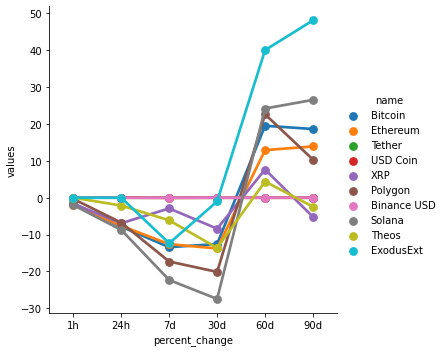

In [91]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_top, kind='point')

### Bitcoin mapping over the timestamp

In [104]:
df_bitcoin = df[['name' , 'quote.USD.price' , 'timestamp']]
df_bitcoin = df_bitcoin[df_bitcoin['name'] == 'Bitcoin']
df_bitcoin

,name,quote.USD.price,timestamp
0,Bitcoin,20284.77517,2023-03-09 21:45:08.914679+00:00
5000,Bitcoin,20300.94247,2023-03-09 21:45:24.571586+00:00


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

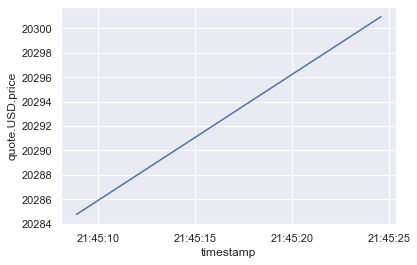

In [105]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df_bitcoin)